In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()
sns.set_palette(sns.color_palette("viridis"))
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(10, 10)})

# Simulacion A

Constants
```
Rc = 0.5
v = 0.03
```

Tuples

```
(N, L) = [(40, 3), (100, 5), (400, 10), (4000, 32), (10000, 50)]
```

In [34]:
df = pd.read_pickle('../TP2/data/simulation_runs_a.pkl')
df, df.shape

(          N  noise  run       t        va
 0        40    0.0    0     0.0  0.077907
 1        40    0.0    0     1.0  0.233412
 2        40    0.0    0     2.0  0.327263
 3        40    0.0    0     3.0  0.385974
 4        40    0.0    0     4.0  0.409819
 ...     ...    ...  ...     ...       ...
 2998  10000    5.0    2   996.0  0.007782
 2999  10000    5.0    2   997.0  0.010584
 3000  10000    5.0    2   998.0  0.016918
 3001  10000    5.0    2   999.0  0.008281
 3002  10000    5.0    2  1000.0  0.013669
 
 [90090 rows x 5 columns],
 (90090, 5))

In [35]:
# Convertir las columnas 'noise', 't' a enteros
df['noise'] = df['noise'].astype(int)
df['t'] = df['t'].astype(int)
df.dtypes

N          int64
noise      int64
run        int64
t          int64
va       float64
dtype: object

In [36]:
# Agrupar los datos por N y noise
grouped = df.groupby(['N', 'noise'])

# Calcular la media, min y max para las últimas 100 mediciones de va
rolling_stats = grouped['va'].rolling(100).agg(['mean', 'min', 'max'])

# Quitar las filas en las que no se han hecho 100 mediciones
rolling_stats = rolling_stats.dropna()

# Resetear el índice del DataFrame resultante
rolling_stats = rolling_stats.reset_index()

# Agregar las estadísticas como nuevas columnas en el DataFrame resultante
grouped_df = grouped.first().reset_index()[['N', 'noise']]
grouped_df = pd.merge(grouped_df, rolling_stats.groupby(['N', 'noise']).last(), on=['N', 'noise'])[['N', 'noise', 'mean', 'min', 'max']]

# Renombrar las columnas 'mean', 'min' y 'max' a 'va_mean', 'va_min' y 'va_max'
grouped_df = grouped_df.rename(columns={'mean': 'va_mean', 'min': 'va_min', 'max': 'va_max', 'noise': 'ruido'})


def add_L_column(n):
    if n == 40:
        return 3.1
    elif n == 100:
        return 5
    elif n == 400:
        return 10
    elif n == 4000:
        return 31.6
    elif n == 10000:
        return 50

grouped_df['L'] = grouped_df['N'].apply(add_L_column)

grouped_df, grouped_df.shape, grouped_df.dtypes

(        N  ruido   va_mean    va_min    va_max     L
 0      40      0  1.000000  1.000000  1.000000   3.1
 1      40      1  0.948453  0.896446  0.972183   3.1
 2      40      2  0.777819  0.633679  0.900575   3.1
 3      40      3  0.429645  0.022448  0.695526   3.1
 4      40      4  0.263905  0.016547  0.535989   3.1
 5      40      5  0.171276  0.020664  0.365250   3.1
 6     100      0  1.000000  1.000000  1.000000   5.0
 7     100      1  0.947471  0.925014  0.962859   5.0
 8     100      2  0.750941  0.679090  0.830850   5.0
 9     100      3  0.444514  0.184558  0.677789   5.0
 10    100      4  0.161636  0.021138  0.383959   5.0
 11    100      5  0.101996  0.010467  0.295836   5.0
 12    400      0  0.999996  0.999994  0.999998  10.0
 13    400      1  0.909804  0.875705  0.922408  10.0
 14    400      2  0.645886  0.583597  0.709927  10.0
 15    400      3  0.206335  0.038990  0.366753  10.0
 16    400      4  0.094151  0.012572  0.176003  10.0
 17    400      5  0.050385 

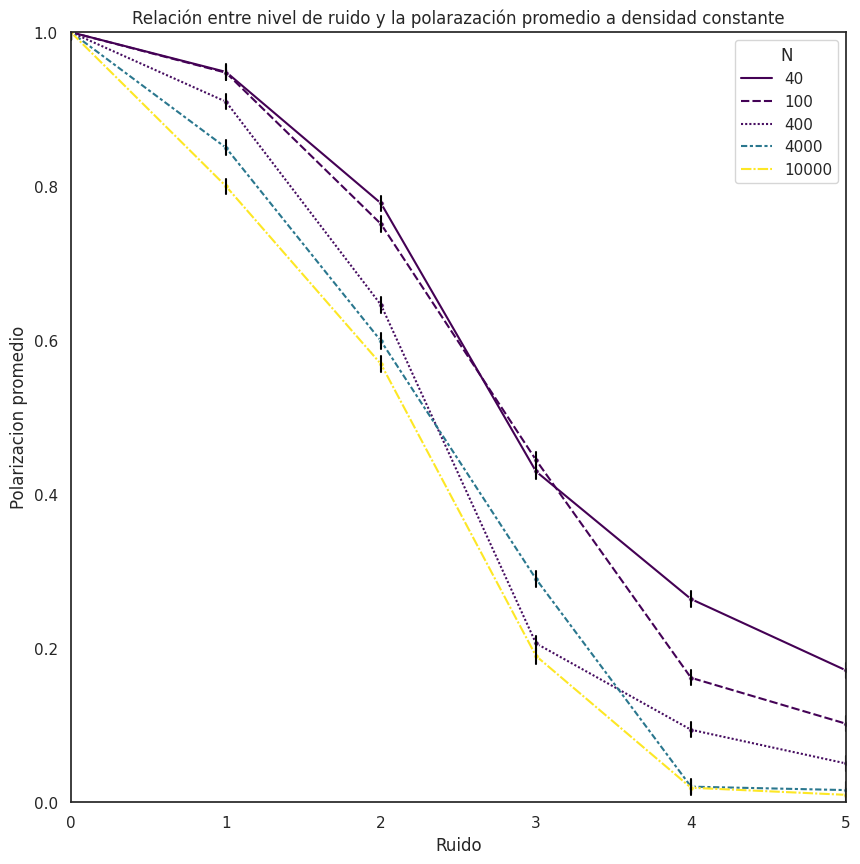

In [38]:
sns.set_theme(style="white")
ax = sns.lineplot(x='ruido', y='va_mean', hue='N', data=grouped_df, style='N', palette='viridis', err_style='bars', err_kws={'capsize': 1}, linewidth=1.5, marker='o', markersize=4)

for _, row in grouped_df.iterrows():
    ax.plot([row['ruido'], row['ruido']], [row['va_mean'] - 0.01, row['va_mean'] + 0.01], color='black')
    
ax.set_ylabel('Polarizacion promedio')
ax.set_xlabel('Ruido')
ax.set_title('Relación entre nivel de ruido y la polarazación promedio a densidad constante')

# Ajustamos los límites de los ejes
ax.set_ylim(0, 1)
ax.set_xlim(grouped_df["ruido"].min(), grouped_df["ruido"].max())

fig = plt.gcf()

# Guardar la imagen como PNG
fig.savefig("va_vs_ruido.png", dpi=300, bbox_inches='tight')

In [49]:
df, df.dtypes

(          N  noise  run     t        va
 0        40      0    0     0  0.077907
 1        40      0    0     1  0.233412
 2        40      0    0     2  0.327263
 3        40      0    0     3  0.385974
 4        40      0    0     4  0.409819
 ...     ...    ...  ...   ...       ...
 2998  10000      5    2   996  0.007782
 2999  10000      5    2   997  0.010584
 3000  10000      5    2   998  0.016918
 3001  10000      5    2   999  0.008281
 3002  10000      5    2  1000  0.013669
 
 [90090 rows x 5 columns],
 N          int64
 noise      int64
 run        int64
 t          int64
 va       float64
 dtype: object)

In [55]:
# Suponiendo que tu DataFrame original se llama df, puedes crear un nuevo DataFrame con los valores medios y std de va de la siguiente manera:
grouped_df = df.groupby(['N', 'noise', 't']).agg({'va': ['mean', 'min', 'max']}).reset_index()

# Renombramos las columnas del nuevo DataFrame
grouped_df.columns = ['N', 'noise', 't', 'va_mean', 'va_min', 'va_max']

grouped_df = grouped_df.rename(columns={'noise': 'ruido'})

grouped_df, grouped_df.shape

(           N  ruido     t   va_mean    va_min    va_max
 0         40      0     0  0.083669  0.076733  0.096366
 1         40      0     1  0.193150  0.099707  0.246331
 2         40      0     2  0.243237  0.124921  0.327263
 3         40      0     3  0.289597  0.187266  0.385974
 4         40      0     4  0.325252  0.239345  0.409819
 ...      ...    ...   ...       ...       ...       ...
 30025  10000      5   996  0.005844  0.001615  0.008134
 30026  10000      5   997  0.008623  0.006199  0.010584
 30027  10000      5   998  0.011553  0.007623  0.016918
 30028  10000      5   999  0.007508  0.005769  0.008474
 30029  10000      5  1000  0.011035  0.006286  0.013669
 
 [30030 rows x 6 columns],
 (30030, 6))

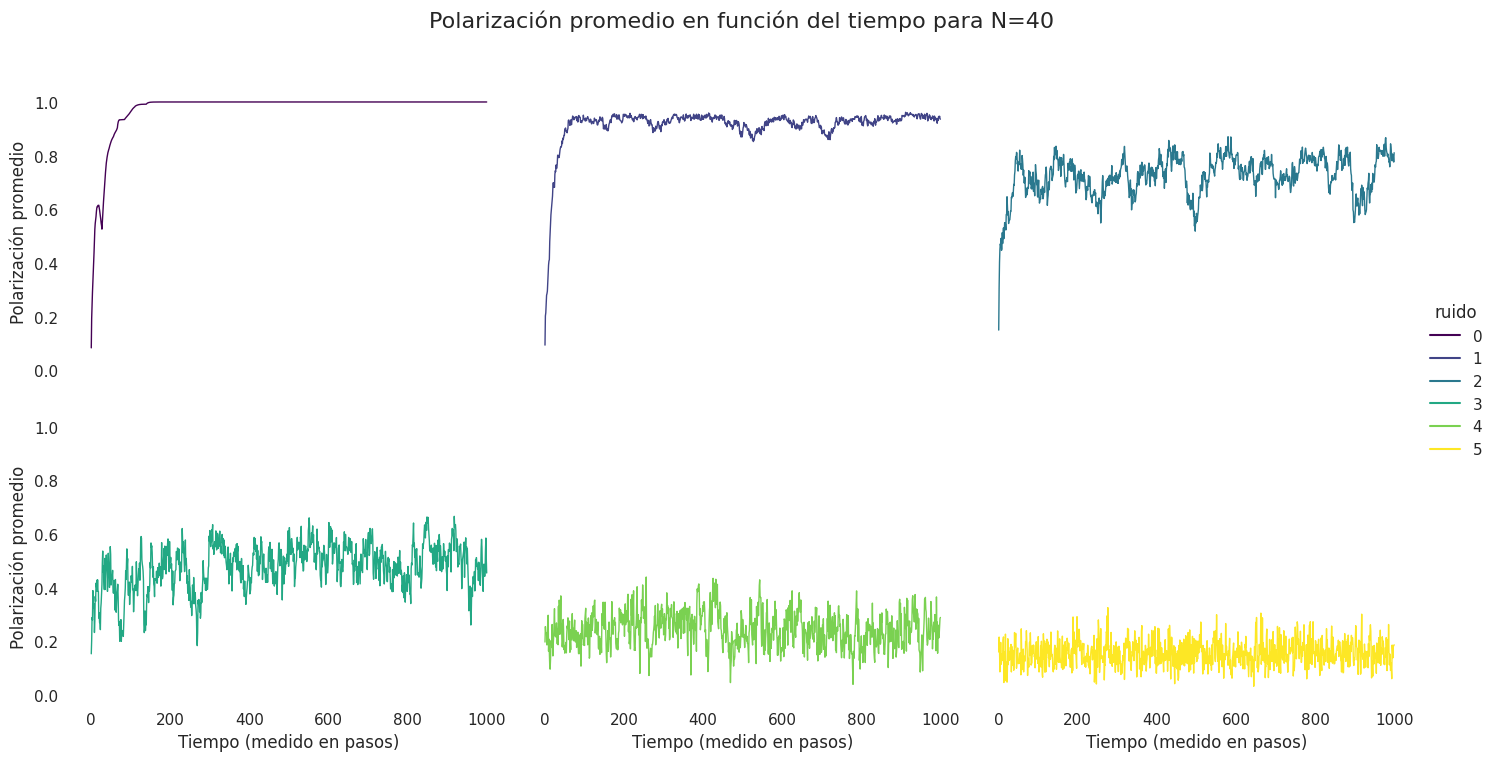

In [73]:
df_400 = grouped_df.loc[grouped_df['N'] == 40]
df_400 = df_400.drop('N', axis=1)
df_400, df_400.shape

# Plot each noise's time series in its own facet
g = sns.relplot(
    data=df_400,
    x="t", y="va_mean", col="ruido", hue="ruido",
    kind="line", palette="viridis", linewidth=1, zorder=5,
    col_wrap=3, height=4, aspect=1.2, legend=True,
    err_kws={'capsize':3, 'elinewidth':3, 'capthick':1}
)

# Iterate over each subplot to customize further
# for noise, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    # ax.text(.01, .85, f"ruido={int(noise)}", transform=ax.transAxes, fontweight="regular")

    # # Plot every noise's time series in the background
    # sns.lineplot(
    #     data=df_400, x="t", y="va_mean", units='ruido',
    #     estimator=None, color=".7", linewidth=1, ax=ax,
    # )

for ax in g.axes.flat:
    ax.set_frame_on(False)

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("Tiempo (medido en pasos)", "Polarización promedio")
plt.suptitle('Polarización promedio en función del tiempo para N=40', y=0.95, fontsize=16)
plt.subplots_adjust(top=0.85)

fig = plt.gcf()

# Guardar la imagen como PNG
fig.savefig("va_vs_tiempo.png", dpi=300, bbox_inches='tight')

# Simulacion B

```
L = 20
Rc = 0.5
v = 0.03
n = 1

N[] = [40, 100, 4000, 10000]
```

In [29]:
df = pd.read_pickle('../TP2/data/simulation_runs_b.pkl')

L = 20
n = 1

df = df.drop('noise', axis=1)
df['t'] = df['t'].astype(int)

df['N'] = df['N'] / (L**2)
df = df.rename(columns={'N': 'densidad'})

df, df.shape

(      densidad  run     t        va
 0          0.1    0     0  0.144007
 1          0.1    0     1  0.092264
 2          0.1    0     2  0.091224
 3          0.1    0     3  0.107051
 4          0.1    0     4  0.127790
 ...        ...  ...   ...       ...
 2998      25.0    2   996  0.776876
 2999      25.0    2   997  0.778151
 3000      25.0    2   998  0.779134
 3001      25.0    2   999  0.778763
 3002      25.0    2  1000  0.778562
 
 [15015 rows x 4 columns],
 (15015, 4))

In [18]:
# Agrupar los datos por N y noise
grouped = df.groupby(['densidad'])

# Calcular la media, min y max para las últimas 100 mediciones de va
rolling_stats = grouped['va'].rolling(100).agg(['mean', 'min', 'max'])

# Quitar las filas en las que no se han hecho 100 mediciones
rolling_stats = rolling_stats.dropna()

# Resetear el índice del DataFrame resultante
rolling_stats = rolling_stats.reset_index()

# Agregar las estadísticas como nuevas columnas en el DataFrame resultante
grouped_df = grouped.first().reset_index()[['densidad']]
grouped_df = pd.merge(grouped_df, rolling_stats.groupby(['densidad']).last(), on=['densidad'])[['densidad', 'mean', 'min', 'max']]

# Renombrar las columnas 'mean', 'min' y 'max' a 'va_mean', 'va_min' y 'va_max'
grouped_df = grouped_df.rename(columns={'mean': 'va_mean', 'min': 'va_min', 'max': 'va_max'})
grouped_df

,densidad,va_mean,va_min,va_max
0,0.10,0.211685,0.020725,0.449456
1,0.25,0.105147,0.015361,0.189582
2,1.00,0.603057,0.485826,0.686973
3,10.00,0.810495,0.789366,0.823840
4,25.00,0.748319,0.729965,0.779134


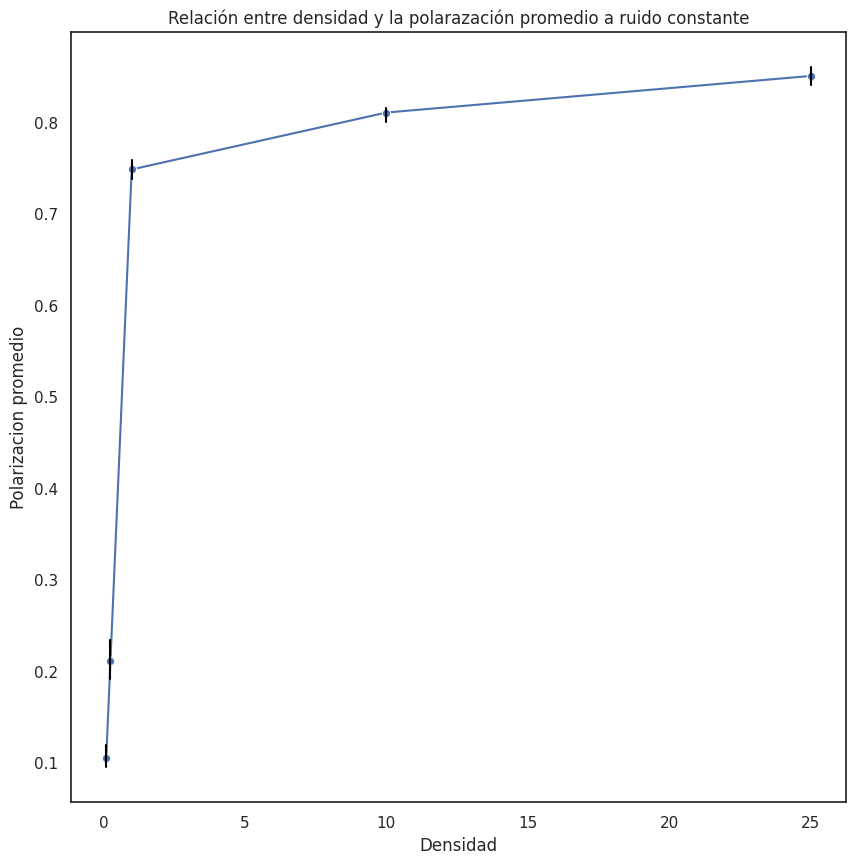

In [20]:
sns.set_theme(style="white")
ax = sns.lineplot(x='densidad', y='va_mean', data=grouped_df, palette='viridis', marker='o')

for _, row in grouped_df.iterrows():
    ax.plot([row['densidad'], row['densidad']], [row['va_min'], row['va_max']], color='black')

ax.set_ylabel('Polarizacion promedio')
ax.set_xlabel('Densidad')
ax.set_title('Relación entre densidad y la polarazación promedio a ruido constante')

fig = plt.gcf()

# Guardar la imagen como PNG
fig.savefig("va_vs_densidad.png", dpi=300, bbox_inches='tight')